Let's consider the following system:

$$ \dot{x}_1 = x_1 x_2^3$$
$$ \dot{x}_2 = -x_2 - x_1^2 + 2 x_1^8$$  

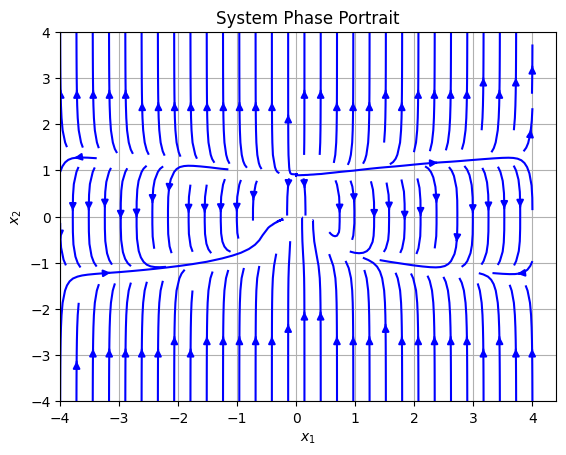

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the Van der Pol oscillator
def system(t, x):
    dx1dt = x[0]*x[1]**3
    dx2dt = -x[1] - x[0]**2 + 2*x[1]**8
    dxdt = [dx1dt, dx2dt]
    return dxdt

# Get the vector field
x = np.linspace(-4, 4, 400)
y = np.linspace(-4, 4, 400)
X, Y = np.meshgrid(x, y)
U, V = np.zeros(X.shape), np.zeros(Y.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        dxdt = system(0, [X[i, j], Y[i, j]])
        U[i, j], V[i, j] = dxdt

plt.streamplot(X, Y, U, V, color='b')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('System Phase Portrait')
plt.grid()
plt.show()

We can see by observation taht the only equilibrium point is $x = (0,0)$. Linearizing our system about this equilibrium gives us:
$$ A = \left. \frac{\partial f}{\partial x} \right|_{x = 0} = \begin{bmatrix} 0 & 0 \\ 0 & - 1\end{bmatrix} $$

Thus, our system is already in a form that can be applied to center manifold theorem. But for clarity, we will define our change of coordinates as:
$$ \begin{bmatrix} y \\ z \end{bmatrix} = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}$$ 

This also translates our system dynamics (again, just given for clarity) to:
\begin{align*}
    \dot{y} &= y z^3 \\
    \dot{z} &= -z - y^2 + 2z^8
\end{align*}

 We can solve for the center manifold (defined as $z = h(y)$, characterized by $w \triangleq z - h(y) = 0$) by finding a representation of $h(y)$ that satisfies the following invariance condition:
\begin{align*}
    \dot{w} &= \dot{z} - \frac{\partial h(y)}{\partial y}\dot{y} \\ 
    \dot{w} &= (-z - y^2 + 2z^8) - \frac{\partial h(y)}{\partial y}(y z^3)
\end{align*}

Substituting in $z = h(y)$ yields:
\begin{align*}
    \dot{w} &= (-h(y) - y^2 + 2(h(y)^8)) - \frac{\partial h(y)}{\partial y}(y (h(y))^3)
\end{align*}

Since $y \in \R$ is scalar, we can hypothesize that it takes the form of a power expansion: $h(y) = h_2 y^2 + O(3)$. (Note here that $h_0 = h_1 = 0$ since $h(0) = 0$ and $\partial h/\partial y (0) = 0$ due to the equilibrium point)


Plugging this form for $h(y)$ into our previous expression yields:
\begin{align*}
    \dot{w} &= (-(h_2 y^2 + O(3)) - y^2 + 2((h_2 y^2 + O(3))^8)) - \frac{\partial (h_2 y^2 + O(3))}{\partial y}(y (h_2 y^2 + O(3))^3) \\
    &= -h_2 y^2 - y^2 + O(3) \\ 
    &= (-h_2 - 1)y^2 + O(3)
\end{align*}

This gives us $h_1 = -1$ (since $\dot{w} = 0$) which results in the center manifold $h(y) = -y^2$. 

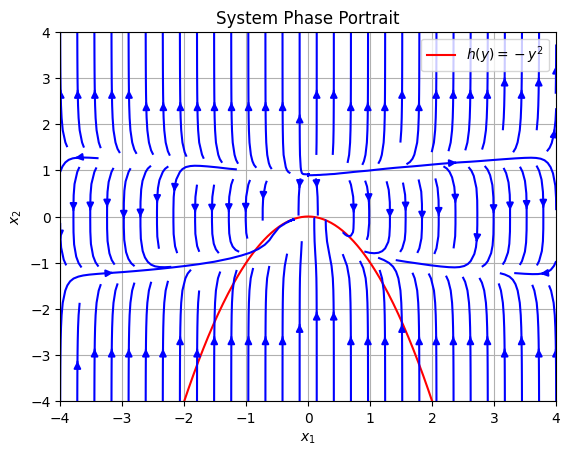

In [31]:

def manifold(x):
    z = -x**2
    return z

x = np.linspace(-4, 4, 400)
y = manifold(x)

plt.plot(x, y, 'r', label=r'$h(y) = -y^2$')
plt.legend()

plt.streamplot(X, Y, U, V, color='b')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('System Phase Portrait')
plt.grid()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

We can verify this calculating using the following symbolic solver

In [32]:
from sympy import symbols, Eq, solve, expand, collect, series

# Define the symbols
y = symbols('y')
h2 = symbols('h2')

# Define h(y)
h_y = h2 * y**2 

# Compute the derivative
h_y_prime = h_y.diff(y)

# Define the invariance condition
invariance_condition = (-h_y - y**2 + 2 * (h_y)**8) - (h_y_prime * y * (h_y)**3)

# Expand and truncate the series at y^3
invariance_condition = expand(invariance_condition).series(y, 0, 3).removeO()

# Collect terms in y
coeff_y0 = invariance_condition.coeff(y, 0)
coeff_y1 = invariance_condition.coeff(y, 1)
coeff_y2 = invariance_condition.coeff(y, 2)

# Solve for h2 such that all coefficients vanish
solutions = solve([Eq(coeff_y0, 0), Eq(coeff_y1, 0), Eq(coeff_y2, 0)], (h2))

# Print the solutions
print(solutions)


{h2: -1}


Plugging $z = h(y) = -y^2$ back into our original dynamics for $\dot{y}$ yields the reduced-dimensional system

$$ \dot{y} = y (-y^2)^3 = - y^7$$

This system is stable, so we can conclude that the origin of the full system is stable

## Higher-Order Manifold

We can go further and show that a higher order expansion would give us a better representation of the center manifold. By observation, we can see that we will need at least an 8-th order expansion for our system. We will solve this symbolically... 


In [33]:
from sympy import symbols, Eq, solve, expand, collect, series

# Define the symbols
y = symbols('y')
h2, h3, h4, h5, h6, h7, h8 = symbols('h2 h3 h4 h5 h6 h7 h8')

# Define h(y)
h_y = h2 * y**2 + h3 * y**3 + h4 * y**4 + h5 * y**5 + h6 * y**6 + h7 * y**7 + h8 * y**8

# Compute the derivative
h_y_prime = h_y.diff(y)

# Define the invariance condition
invariance_condition = (-h_y - y**2 + 2 * (h_y)**8) - (h_y_prime * y * (h_y)**3)

# Expand and truncate the series at y^3
invariance_condition = expand(invariance_condition).series(y, 0, 9).removeO()

# Collect terms in y
coeff_y0 = invariance_condition.coeff(y, 0)
coeff_y1 = invariance_condition.coeff(y, 1)
coeff_y2 = invariance_condition.coeff(y, 2)
coeff_y3 = invariance_condition.coeff(y, 3)
coeff_y4 = invariance_condition.coeff(y, 4)
coeff_y5 = invariance_condition.coeff(y, 5)
coeff_y6 = invariance_condition.coeff(y, 6)
coeff_y7 = invariance_condition.coeff(y, 7)
coeff_y8 = invariance_condition.coeff(y, 8)

# Solve for h2, h3, ..., h8 such that all coefficients vanish
solutions = solve([Eq(coeff_y0, 0), Eq(coeff_y1, 0), Eq(coeff_y2, 0), Eq(coeff_y3, 0), Eq(coeff_y4, 0), Eq(coeff_y5, 0), Eq(coeff_y6, 0), Eq(coeff_y7, 0), Eq(coeff_y8, 0)], (h2, h3, h4, h5, h6, h7, h8))

# Print the solutions
print(solutions)


[(-1, 0, 0, 0, 0, 0, -2)]


This gives us the manifold $z = h(y) = -y^2 - 2y^8$. Plugging this into our reduced-dimensional system yields:

$$ \dot{y} = y z^3 = y(-y^2 - 2y^8) = -y^3 - 2y^9 $$ 

which still allows us to conclude that the full system is stable at the equilibrium $x = 0$

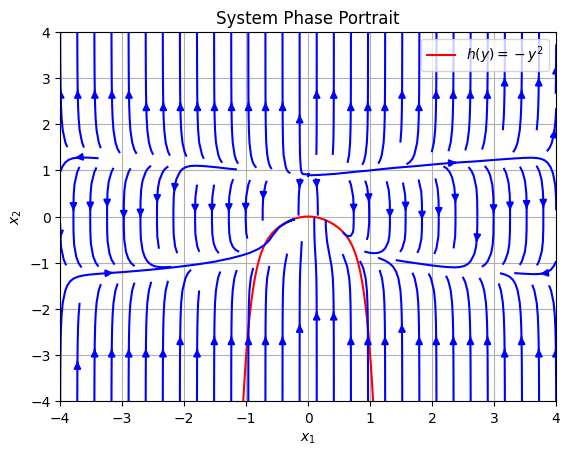

In [34]:
def manifold(x):
    z = -x**2 - 2*x**8
    return z

x = np.linspace(-4, 4, 400)
y = manifold(x)

plt.plot(x, y, 'r', label=r'$h(y) = -y^2$')
plt.legend()

plt.streamplot(X, Y, U, V, color='b')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('System Phase Portrait')
plt.grid()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()